In [1]:
import pickle
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
plt.rcParams["figure.figsize"] = (18,10)

## Combination of Layers

### First vs. Random

In [2]:
# functions for furthre useage
def mark_values(x_axis, y_axis):
    """
    mark the actul values on the plot
    :param x_axis: a list of x-axis values
    :type x_axis: list
    """
    for x, y in zip(x_axis, y_axis):
        label = "{:.2f}".format(y)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(0,8), # distance from text to points (x,y)
                     ha='center')

In [3]:
def comb_plots(data_type, eval_method):
    shares = (25, 50, 75, 100)
    first_res_dict = {"train_con_auc": [], "train_con_accu": [],
                      "test_con_auc": [], "test_con_accu": [],
                      "train_diff_auc": [], "train_diff_accu": [],
                      "test_diff_auc": [], "test_diff_accu": [],
                      "train_ratio_auc": [], "train_ratio_accu": [],
                      "test_ratio_auc": [], "test_ratio_accu": [],
                      "train_log_auc": [], "train_log_accu": [],
                      "test_log_auc": [], "test_log_accu": []}
    random_res_dict = {"train_con_auc": [], "train_con_accu": [],
                       "test_con_auc": [], "test_con_accu": [],
                       "train_diff_auc": [], "train_diff_accu": [],
                       "test_diff_auc": [], "test_diff_accu": [],
                       "train_ratio_auc": [], "train_ratio_accu": [],
                       "test_ratio_auc": [], "test_ratio_accu": [],
                       "train_log_auc": [], "train_log_accu": [],
                       "test_log_auc": [], "test_log_accu": []}
    for share in shares:
        first_file = "../evals/comb_first_{}_{}.pkl".format(share, data_type)
        random_file = "../evals/comb_random_{}_{}.pkl".format(share, data_type)
        with open(first_file, "rb") as f:
            res_dict = pickle.load(f)
            for key in res_dict.keys():
                first_res_dict[key].extend(res_dict[key])
        with open(random_file, "rb") as f:
            res_dict = pickle.load(f)
            for key in res_dict.keys():
                random_res_dict[key].extend(res_dict[key])
    xasis = ["25%", "50%", "75%", "100%"]
    fig = plt.figure()
    plt.subplot(2, 2, 1)
    plt.plot(xasis, first_res_dict["train_diff_"+eval_method], label="first")
    plt.plot(xasis, random_res_dict["train_diff_"+eval_method], label="random")
    plt.title("c-d model on training set on {} dataset".format(data_type))
    plt.legend()
    mark_values(xasis, first_res_dict["train_diff_"+eval_method])
    mark_values(xasis, random_res_dict["train_diff_"+eval_method])

    plt.subplot(2, 2, 2)
    plt.plot(xasis, first_res_dict["test_diff_"+eval_method], label="first")
    plt.plot(xasis, random_res_dict["test_diff_"+eval_method], label="random")
    plt.title("c-d model on test set on {} dataset".format(data_type))
    plt.legend()
    mark_values(xasis, first_res_dict["test_diff_"+eval_method])
    mark_values(xasis, random_res_dict["test_diff_"+eval_method])

    plt.subplot(2, 2, 3)
    plt.plot(xasis, first_res_dict["train_ratio_"+eval_method], label="first")
    plt.plot(xasis, random_res_dict["train_ratio_"+eval_method], label="random")
    plt.title("c/d model on training set on {} dataset".format(data_type))
    plt.legend()
    mark_values(xasis, first_res_dict["train_ratio_"+eval_method])
    mark_values(xasis, random_res_dict["train_ratio_"+eval_method])

    plt.subplot(2, 2, 4)
    plt.plot(xasis, first_res_dict["test_ratio_"+eval_method], label="first")
    plt.plot(xasis, random_res_dict["test_ratio_"+eval_method], label="random")
    plt.title("c/d model on test set on {} dataset".format(data_type))
    plt.legend()
    mark_values(xasis, first_res_dict["test_ratio_"+eval_method])
    mark_values(xasis, random_res_dict["test_ratio_"+eval_method])

    plt.show()

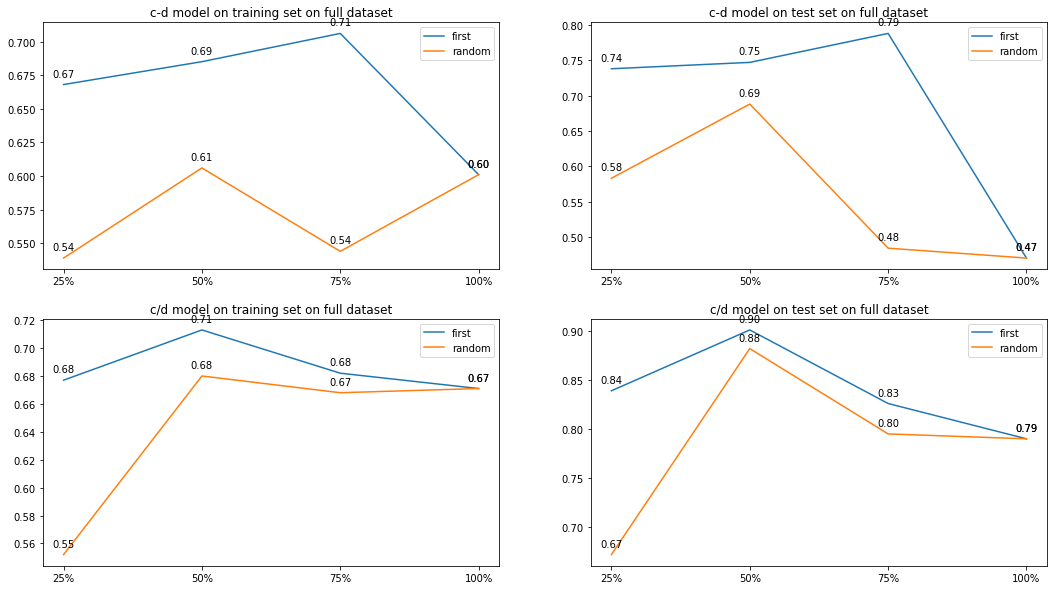

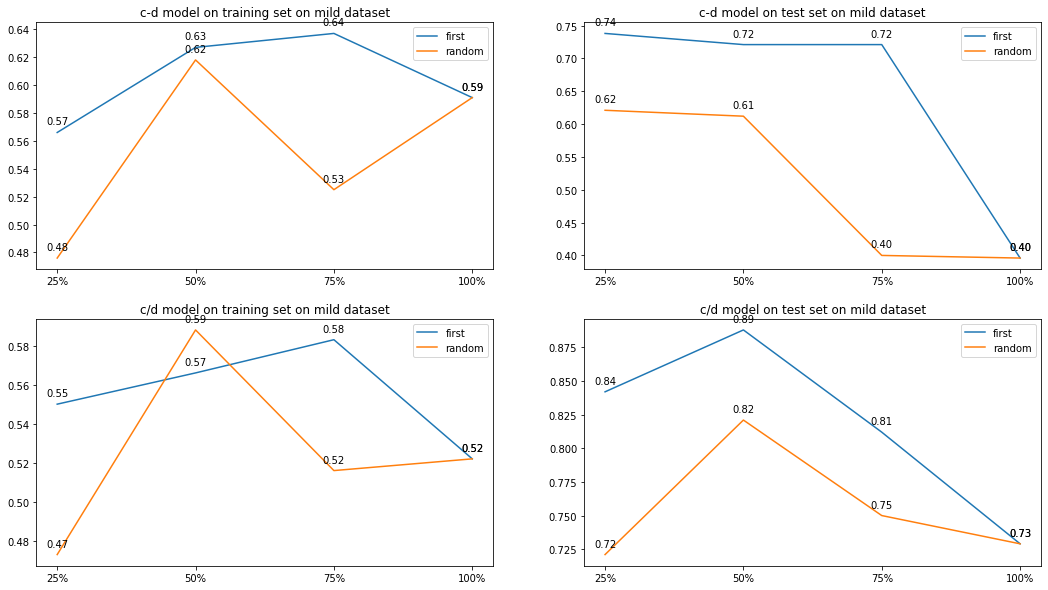

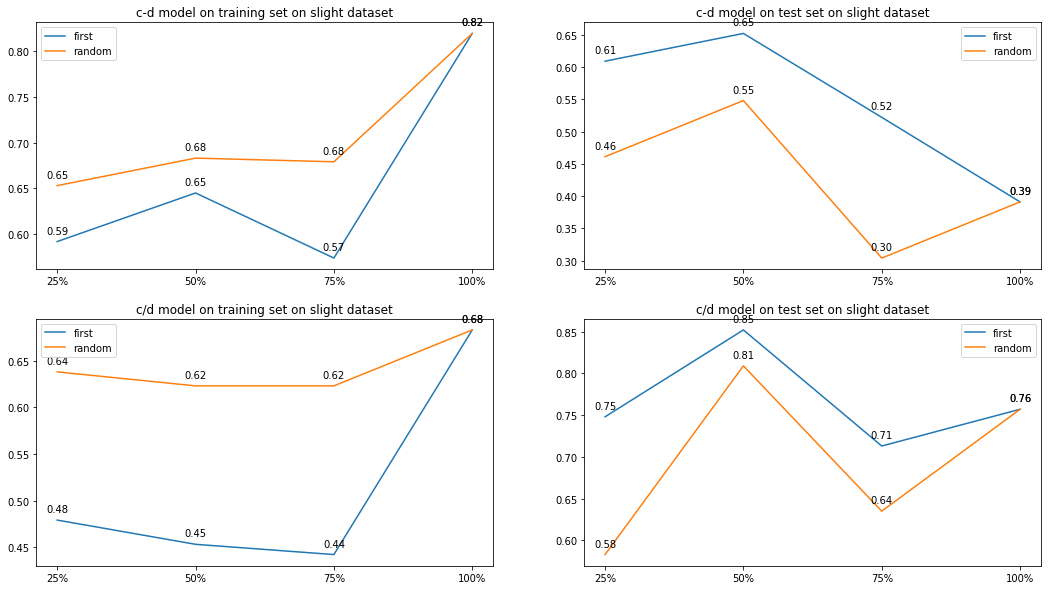

In [4]:
comb_plots("full", "auc")
comb_plots("mild", "auc")
comb_plots("slight", "auc")

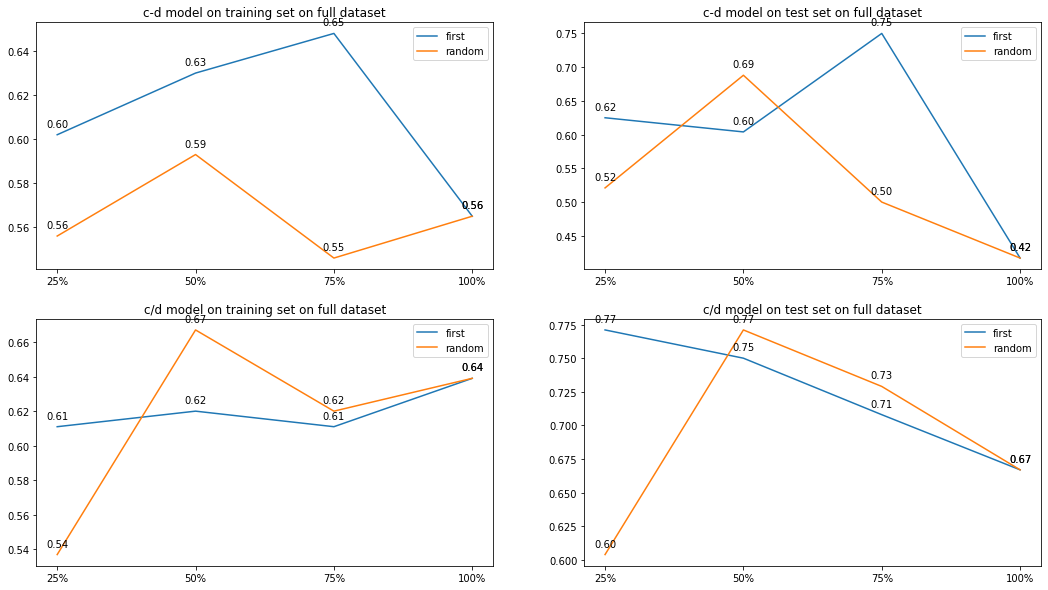

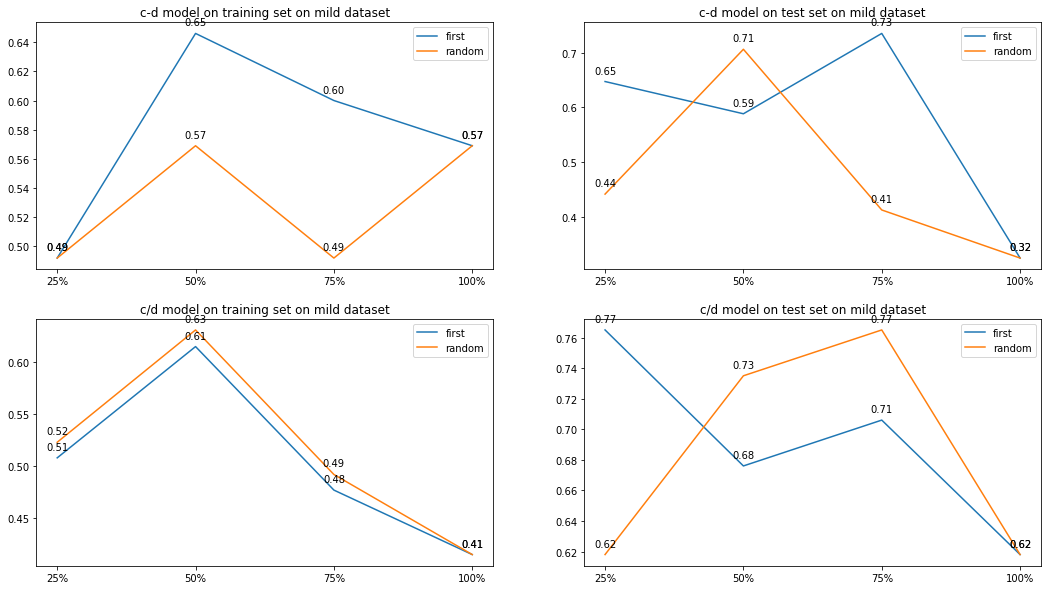

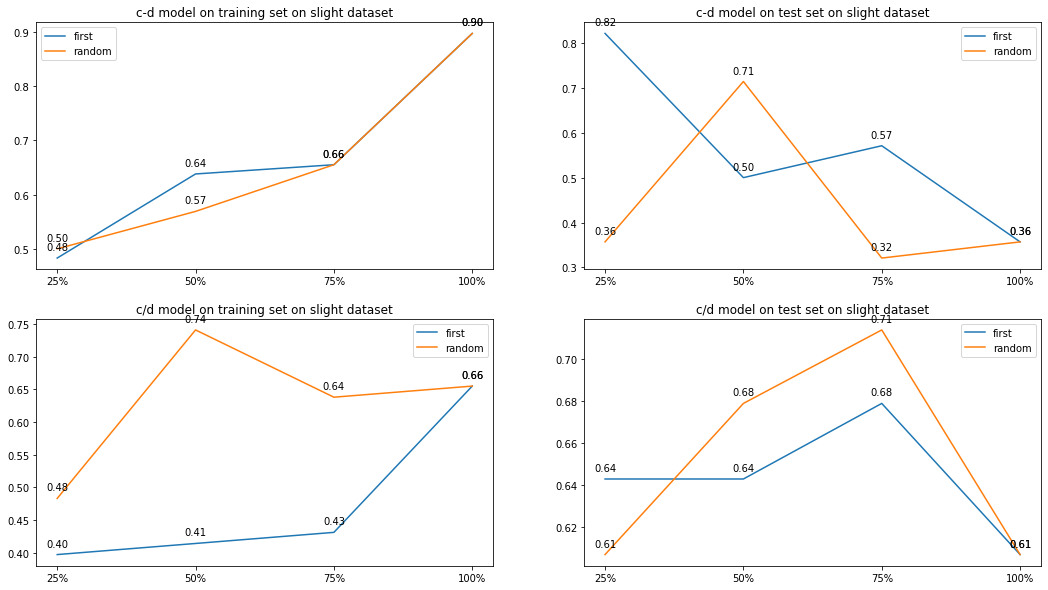

In [5]:
comb_plots("full", "accu")
comb_plots("mild", "accu")
comb_plots("slight", "accu")

## Accumulated Layers

### 25%

In [6]:
share = 25
data_type = "full"
def make_plot(share, data_type, xasis, hammer_style, eval_method):
    first_res_dict = {"train_con_auc": [], "train_con_accu": [],
                      "test_con_auc": [], "test_con_accu": [],
                      "train_diff_auc": [], "train_diff_accu": [],
                      "test_diff_auc": [], "test_diff_accu": [],
                      "train_ratio_auc": [], "train_ratio_accu": [],
                      "test_ratio_auc": [], "test_ratio_accu": [],
                      "train_log_auc": [], "train_log_accu": [],
                      "test_log_auc": [], "test_log_accu": []}
    random_res_dict = {"train_con_auc": [], "train_con_accu": [],
                       "test_con_auc": [], "test_con_accu": [],
                       "train_diff_auc": [], "train_diff_accu": [],
                       "test_diff_auc": [], "test_diff_accu": [],
                       "train_ratio_auc": [], "train_ratio_accu": [],
                       "test_ratio_auc": [], "test_ratio_accu": [],
                       "train_log_auc": [], "train_log_accu": [],
                       "test_log_auc": [], "test_log_accu": []}
    first_file = "../evals/{}_first_{}_{}.pkl".format(hammer_style, share, data_type)
    random_file = "../evals/{}_random_{}_{}.pkl".format(hammer_style, share, data_type)
    with open(first_file, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            first_res_dict[key].extend(res_dict[key])
    with open(random_file, "rb") as f:
        res_dict = pickle.load(f)
        for key in res_dict.keys():
            random_res_dict[key].extend(res_dict[key])
    # better 2x2 subplots
    fig = plt.figure()
    plt.subplot(2, 2, 1)
    plt.plot(xasis, first_res_dict["train_diff_"+eval_method], label="first")
    plt.plot(xasis, random_res_dict["train_diff_"+eval_method], label="random")
    plt.title("c-d model on training set on {} dataset".format(data_type))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, first_res_dict["train_diff_"+eval_method])
    mark_values(xasis, random_res_dict["train_diff_"+eval_method])
    
    plt.subplot(2, 2, 2)
    plt.plot(xasis, first_res_dict["test_diff_"+eval_method], label="first")
    plt.plot(xasis, random_res_dict["test_diff_"+eval_method], label="random")
    plt.title("c-d model on test set on {} dataset".format(data_type))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, first_res_dict["test_diff_"+eval_method])
    mark_values(xasis, random_res_dict["test_diff_"+eval_method])
    
    plt.subplot(2, 2, 3)
    plt.plot(xasis, first_res_dict["train_ratio_"+eval_method], label="first")
    plt.plot(xasis, random_res_dict["train_ratio_"+eval_method], label="random")
    plt.title("c/d model on training set on {} dataset".format(data_type))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, first_res_dict["train_ratio_"+eval_method])
    mark_values(xasis, random_res_dict["train_ratio_"+eval_method])
    
    plt.subplot(2, 2, 4)
    plt.plot(xasis, first_res_dict["test_ratio_"+eval_method], label="first")
    plt.plot(xasis, random_res_dict["test_ratio_"+eval_method], label="random")
    plt.title("c/d model on test set on {} dataset".format(data_type))
    plt.legend()
    plt.xticks(np.arange(min(xasis), max(xasis)+1, 1.0))
    mark_values(xasis, first_res_dict["test_ratio_"+eval_method])
    mark_values(xasis, random_res_dict["test_ratio_"+eval_method])
    
    plt.show()

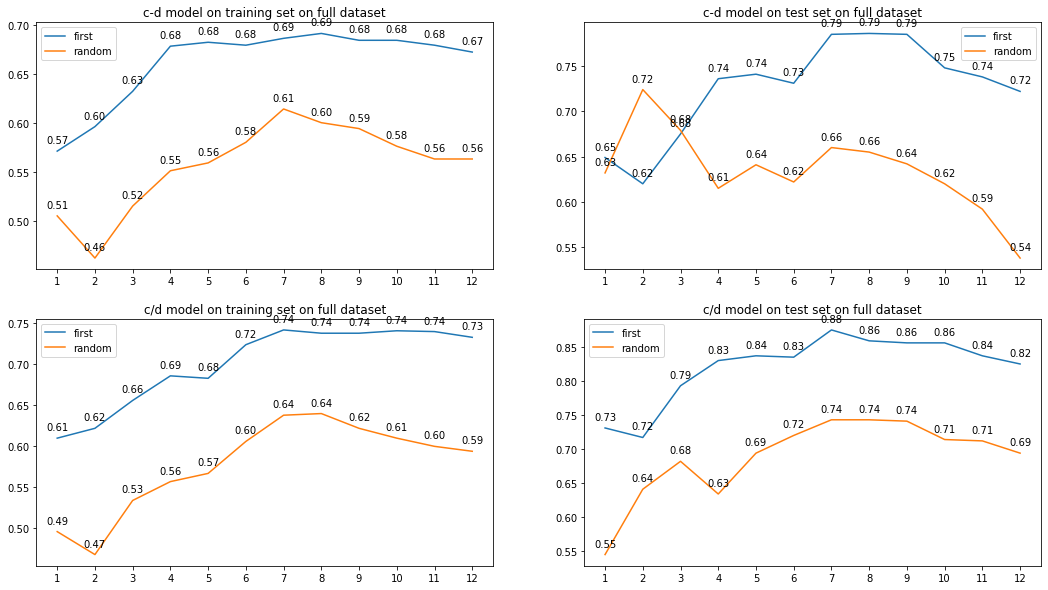

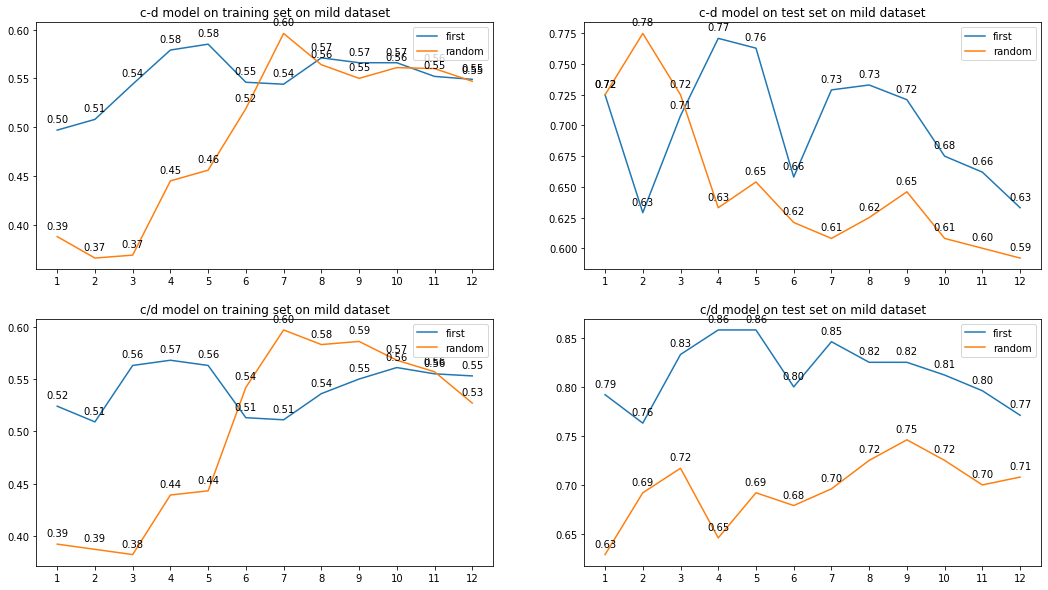

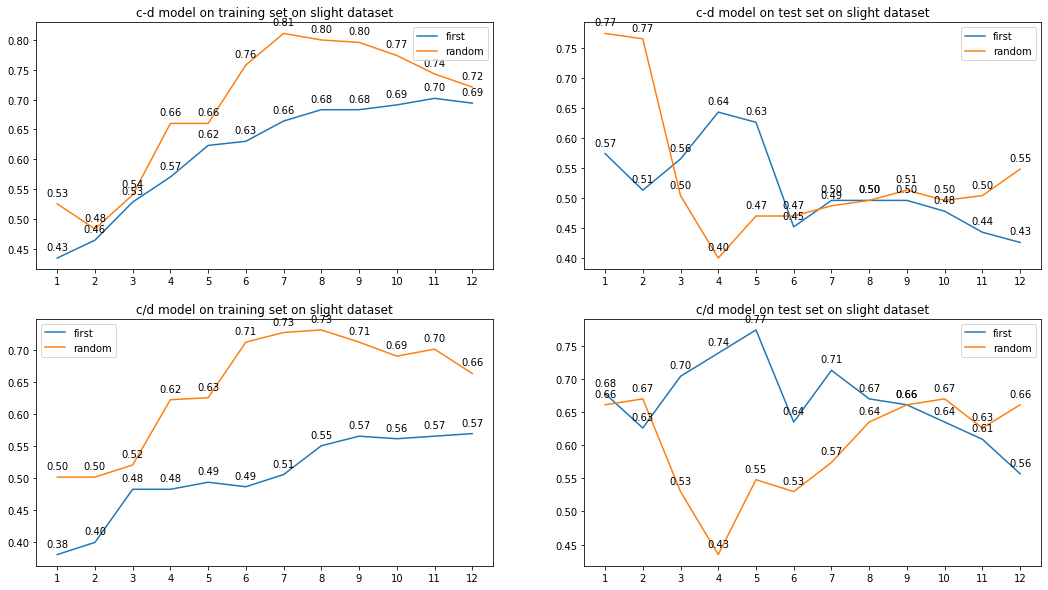

In [7]:
xasis = list(range(1, 13))
make_plot(25, "full", xasis, "accumu", "auc")
make_plot(25, "mild", xasis, "accumu", "auc")
make_plot(25, "slight", xasis, "accumu", "auc")

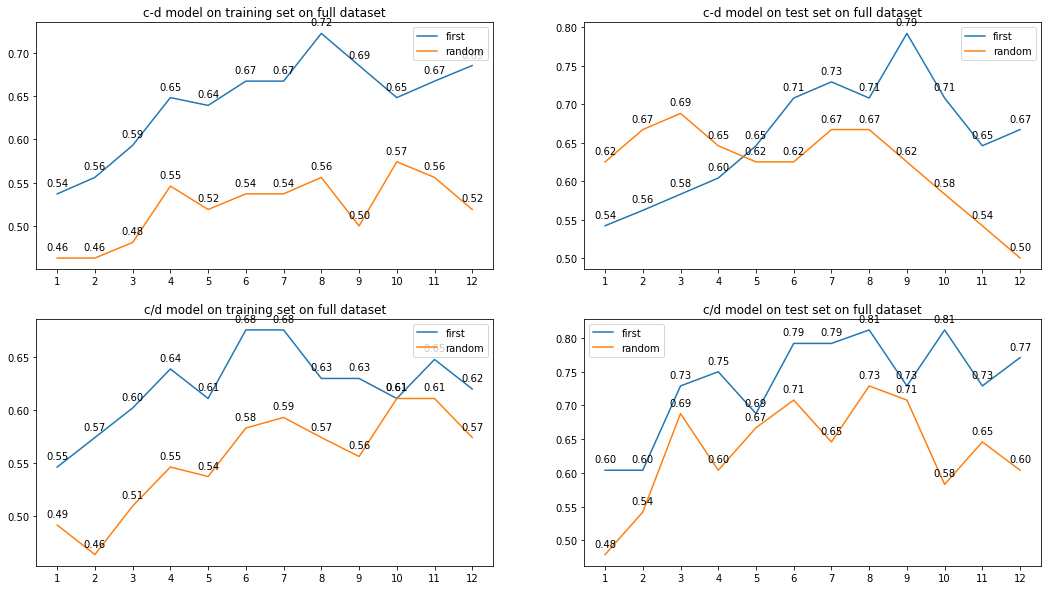

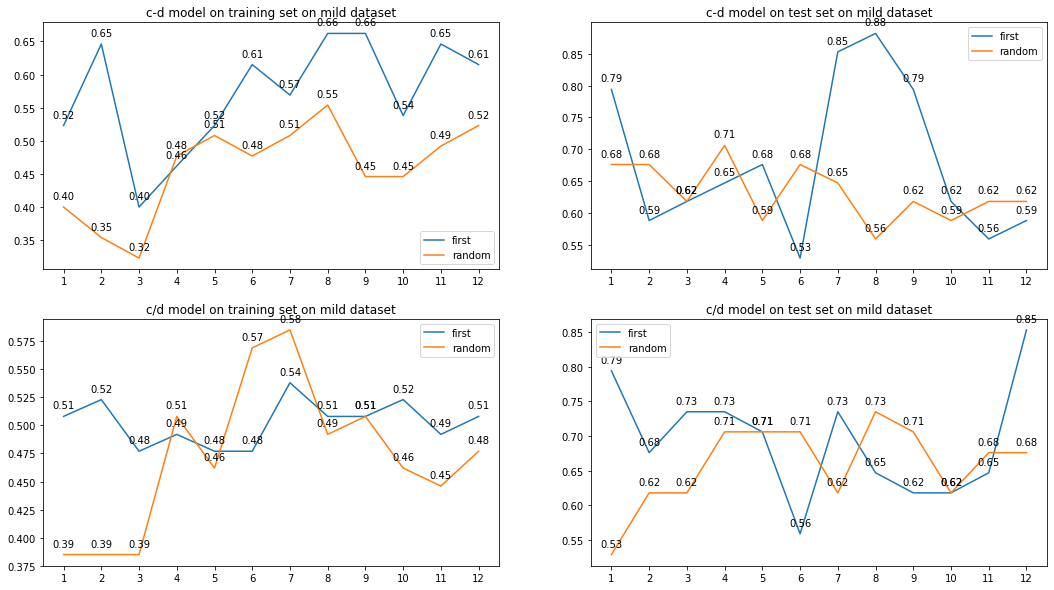

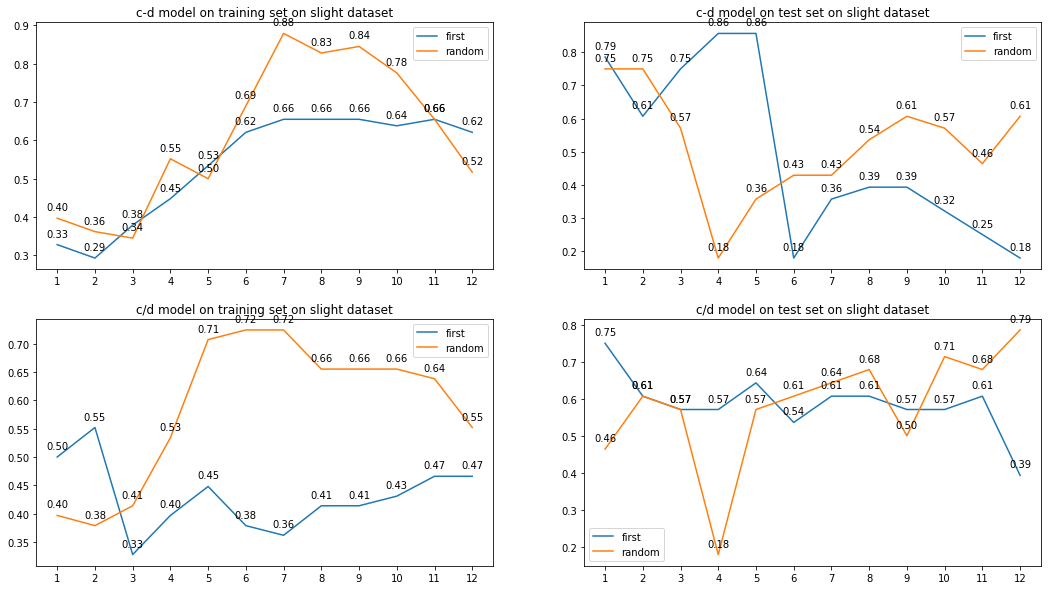

In [8]:
make_plot(25, "full", xasis, "accumu", "accu")
make_plot(25, "mild", xasis, "accumu", "accu")
make_plot(25, "slight", xasis, "accumu", "accu")

### 50%

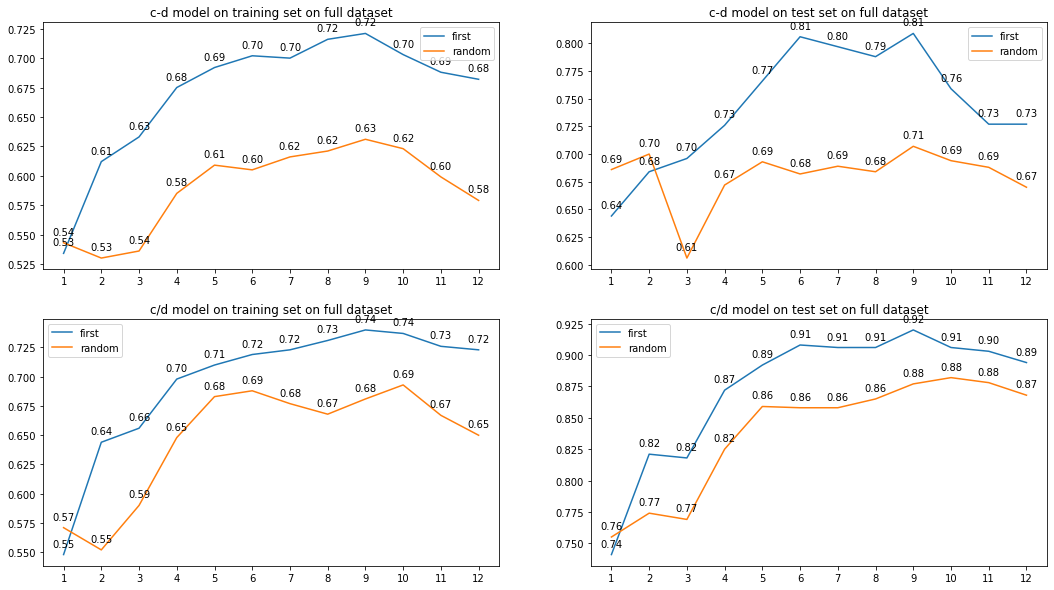

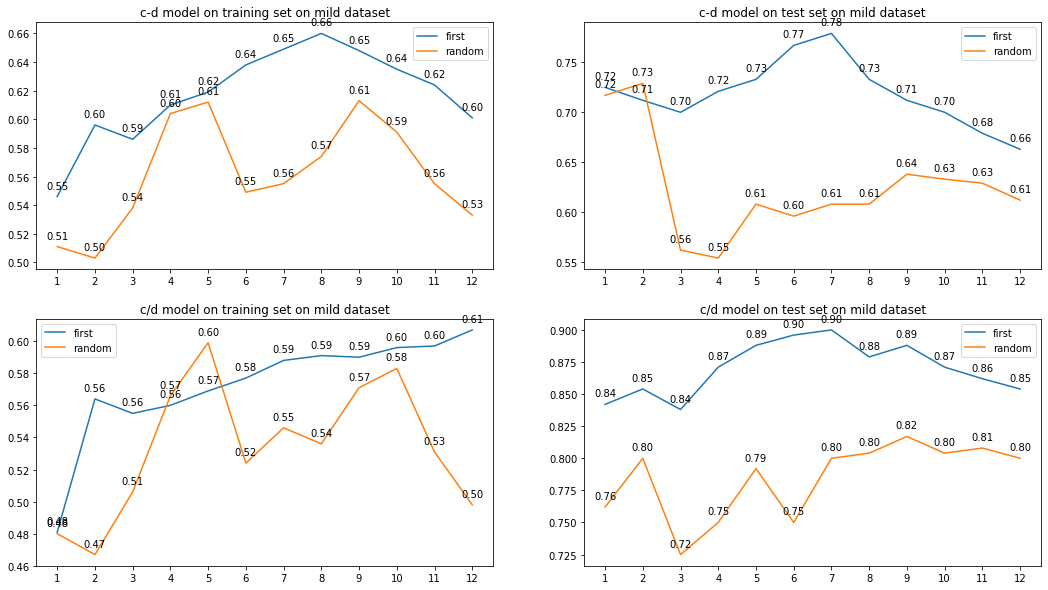

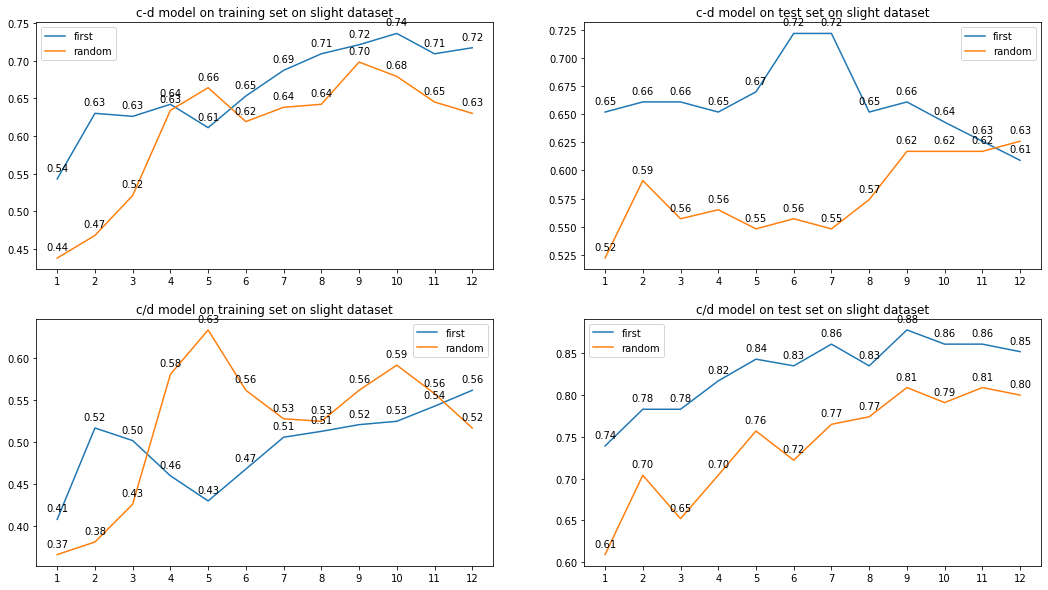

In [9]:
make_plot(50, "full", xasis, "accumu", "auc")
make_plot(50, "mild", xasis, "accumu", "auc")
make_plot(50, "slight", xasis, "accumu", "auc")

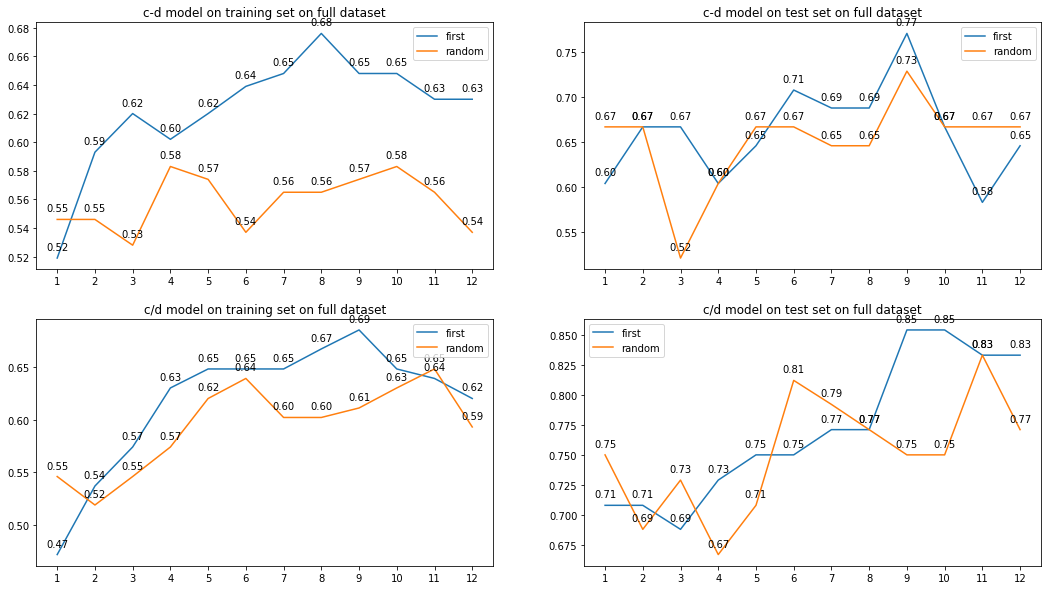

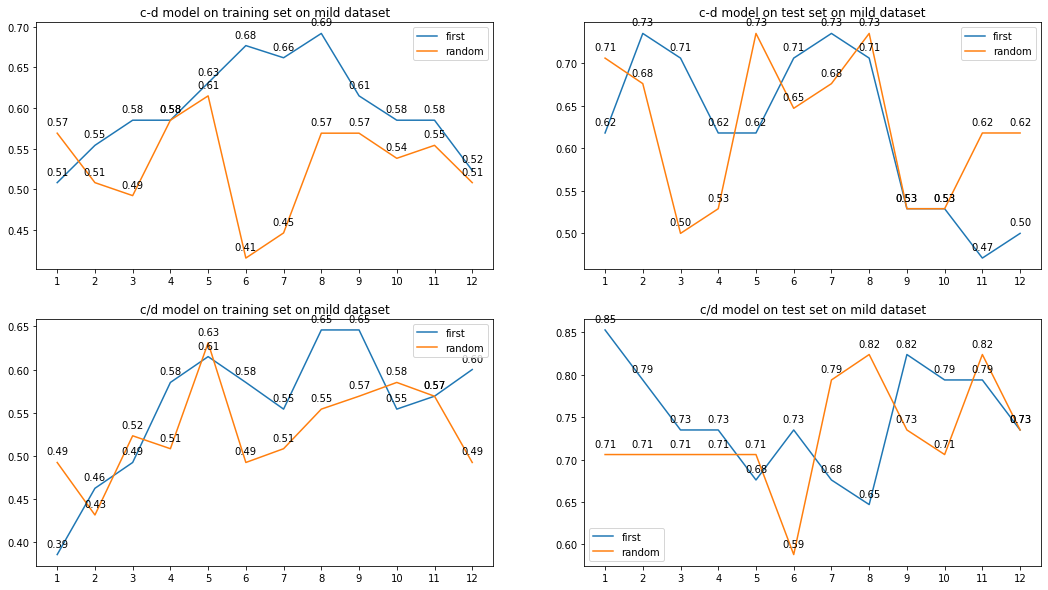

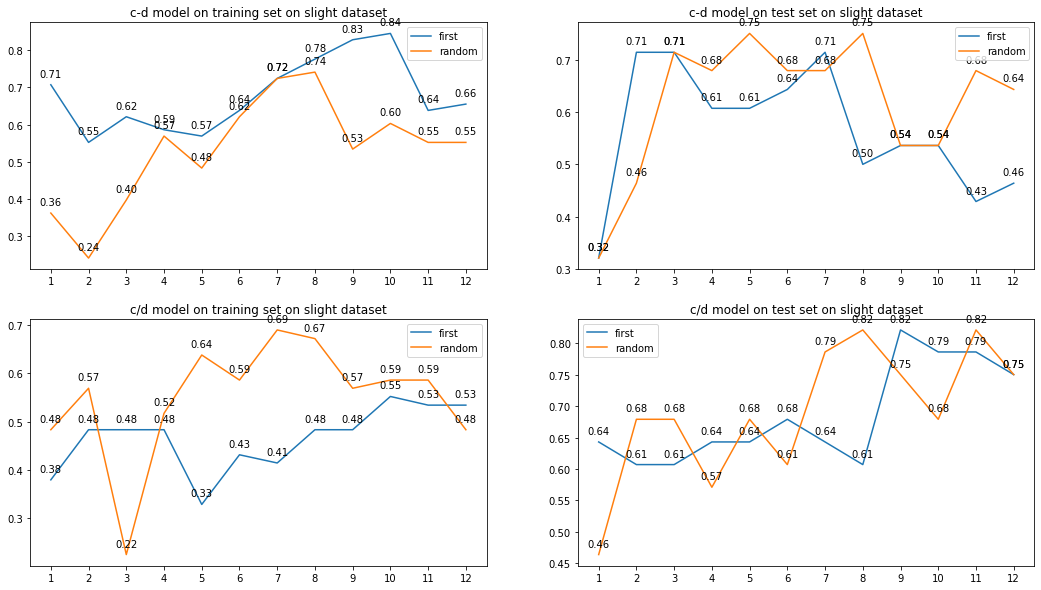

In [10]:
make_plot(50, "full", xasis, "accumu", "accu")
make_plot(50, "mild", xasis, "accumu", "accu")
make_plot(50, "slight", xasis, "accumu", "accu")

### 75%

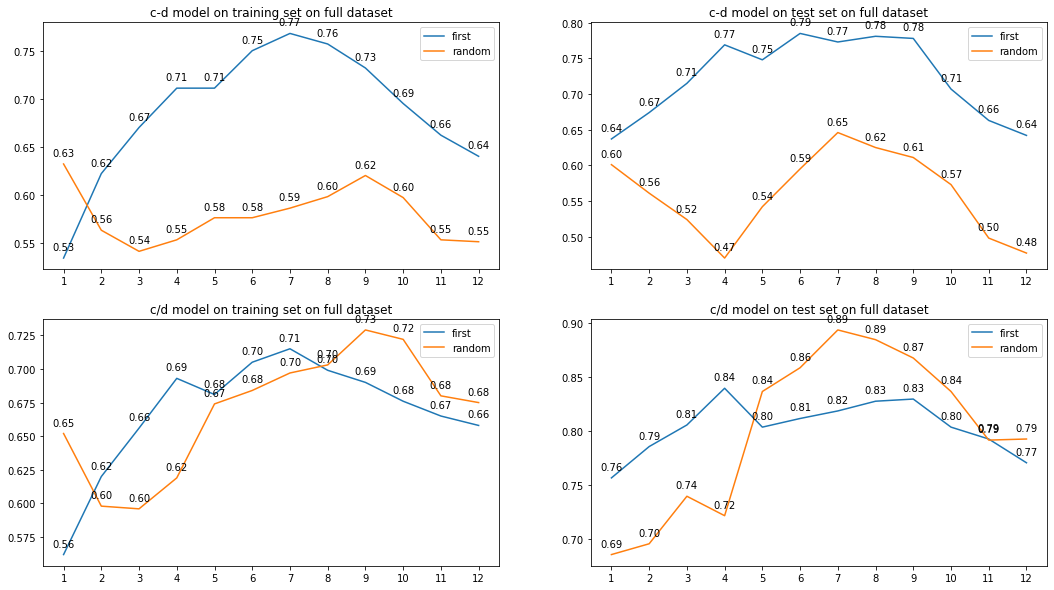

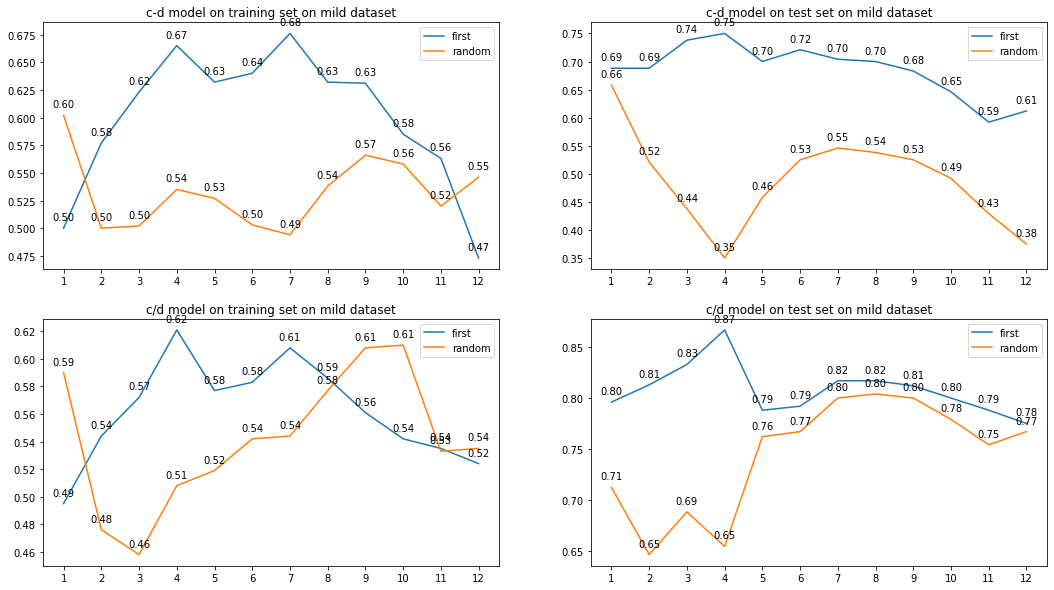

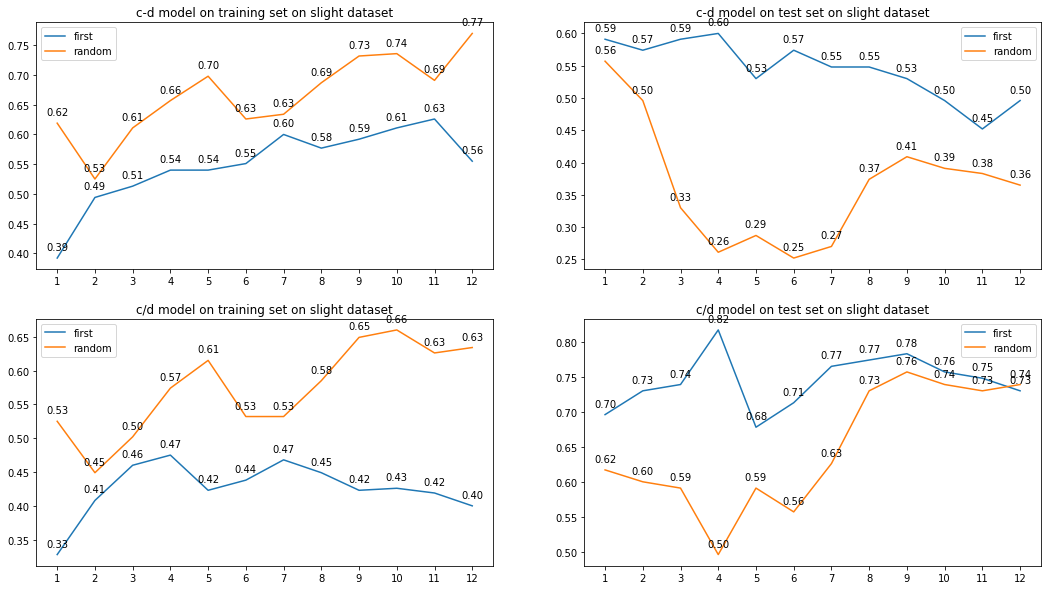

In [11]:
make_plot(75, "full", xasis, "accumu", "auc")
make_plot(75, "mild", xasis, "accumu", "auc")
make_plot(75, "slight", xasis, "accumu", "auc")

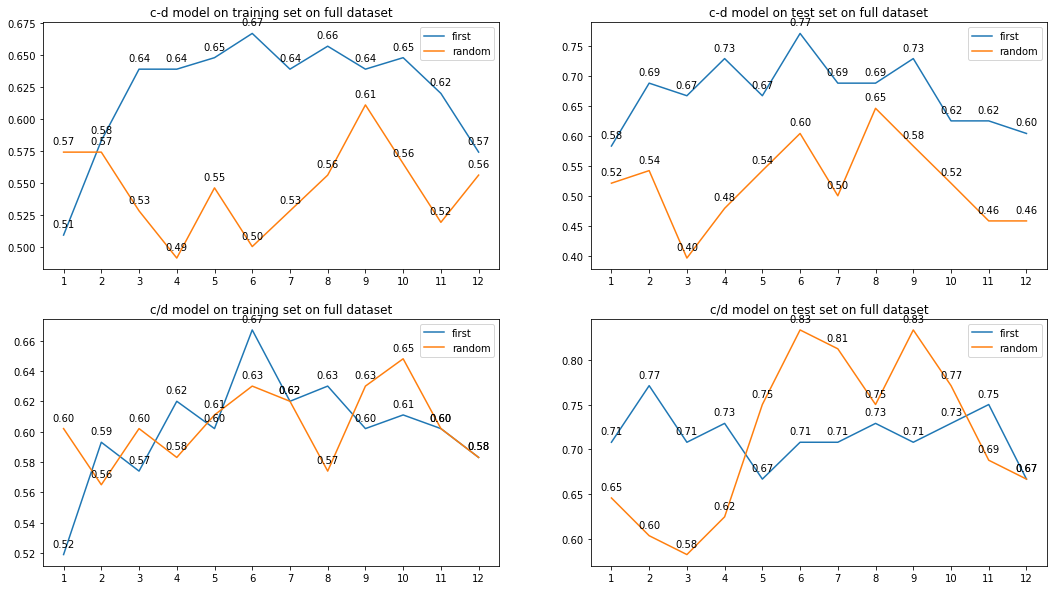

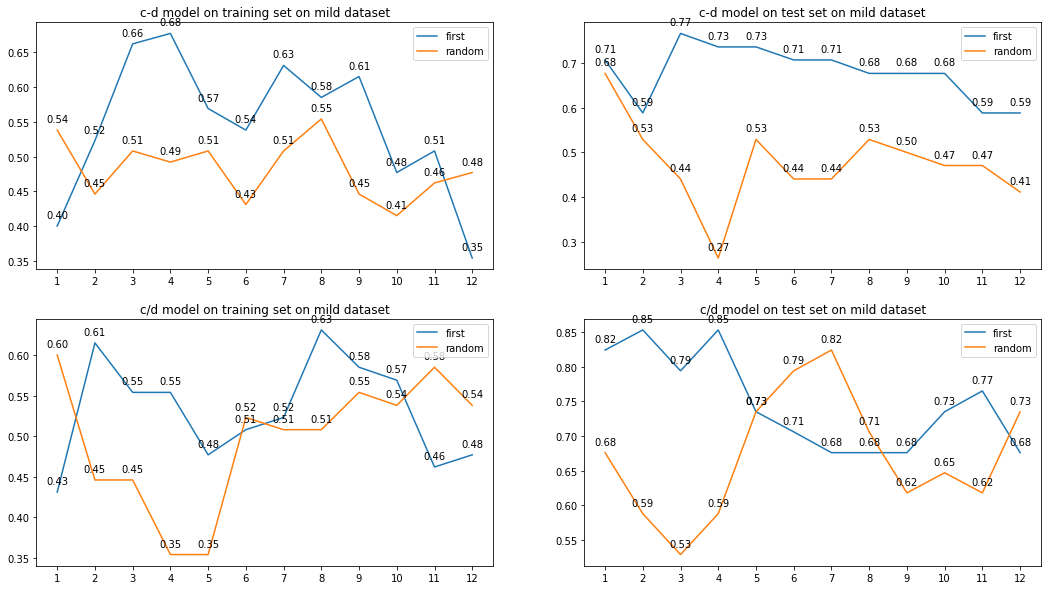

In [12]:
make_plot(75, "full", xasis, "accumu", "accu")
make_plot(75, "mild", xasis, "accumu", "accu")
make_plot(75, "slight", xasis, "accumu", "accu")

### 100%

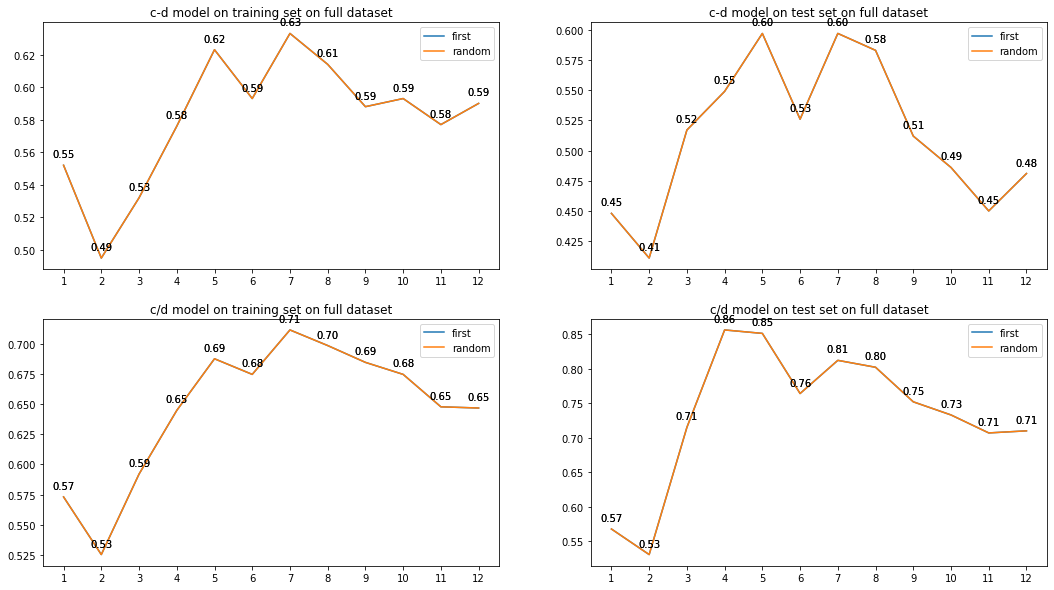

In [13]:
make_plot(100, "full", xasis, "accumu", "auc")
make_plot(100, "mild", xasis, "accumu", "auc")
make_plot(100, "slight", xasis, "accumu", "auc")

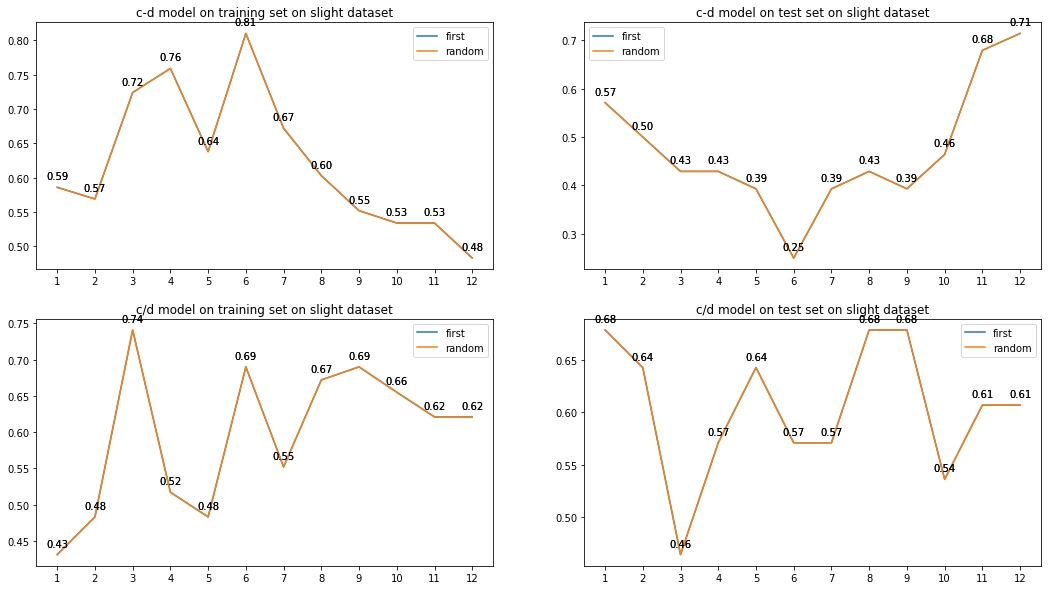

In [14]:
make_plot(100, "full", xasis, "accumu", "accu")
make_plot(100, "mild", xasis, "accumu", "accu")
make_plot(100, "slight", xasis, "accumu", "accu")

# Onetime layers

### 25%

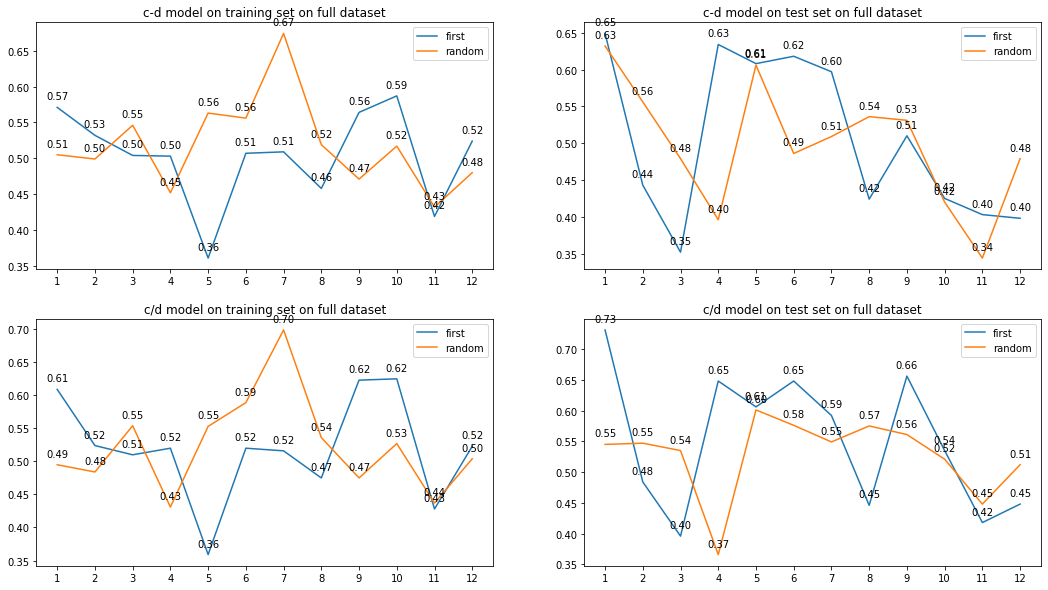

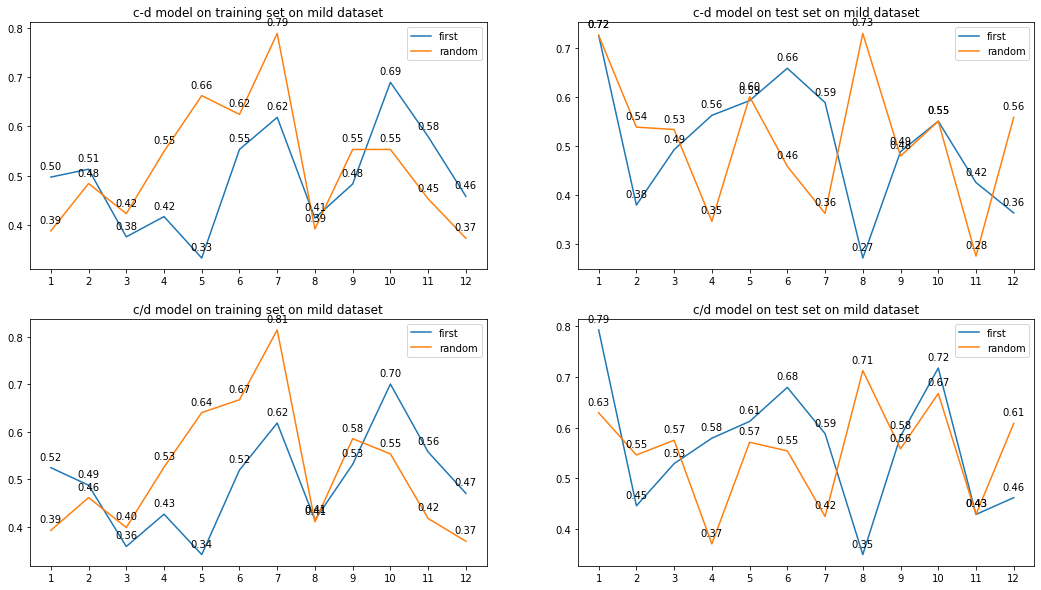

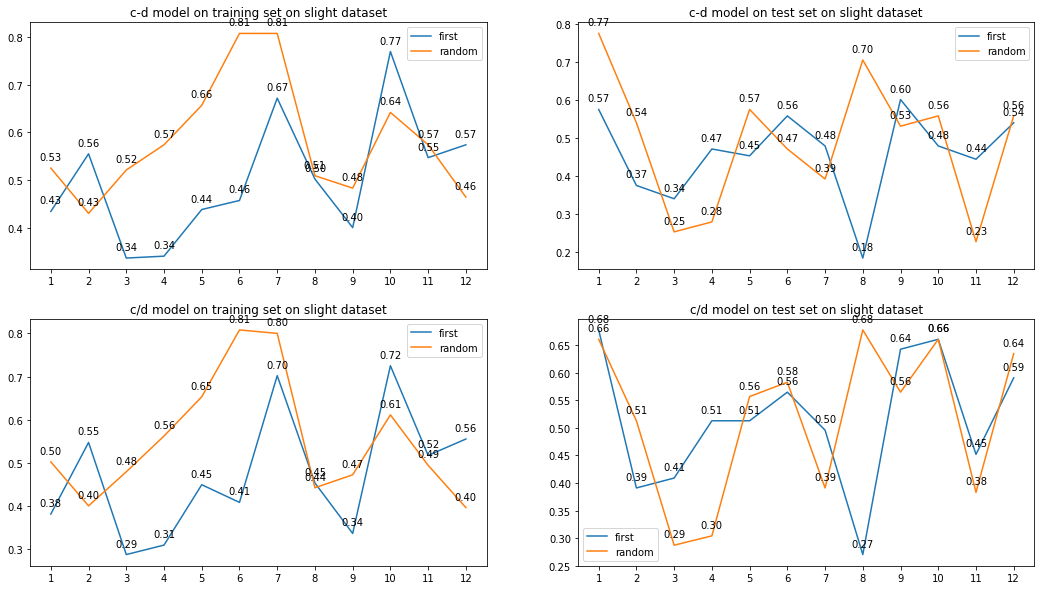

In [15]:
make_plot(25, "full", xasis, "onetime", "auc")
make_plot(25, "mild", xasis, "onetime", "auc")
make_plot(25, "slight", xasis, "onetime", "auc")

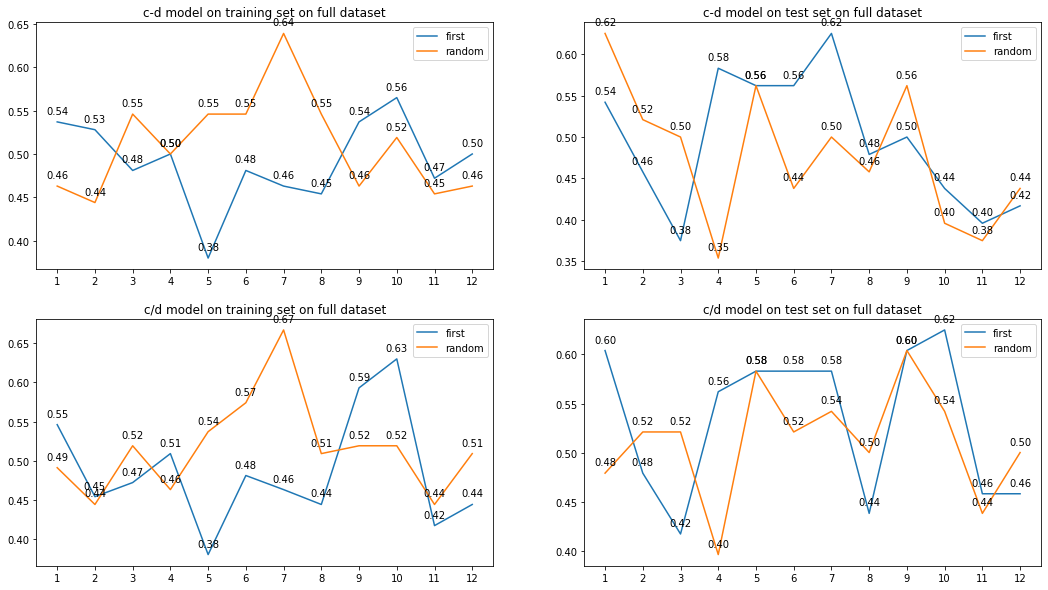

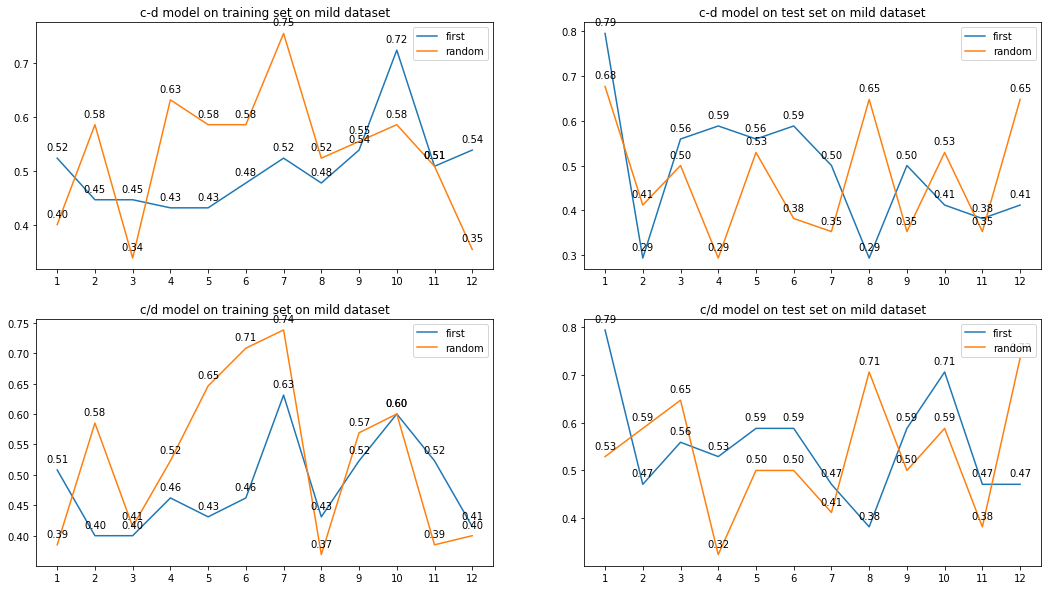

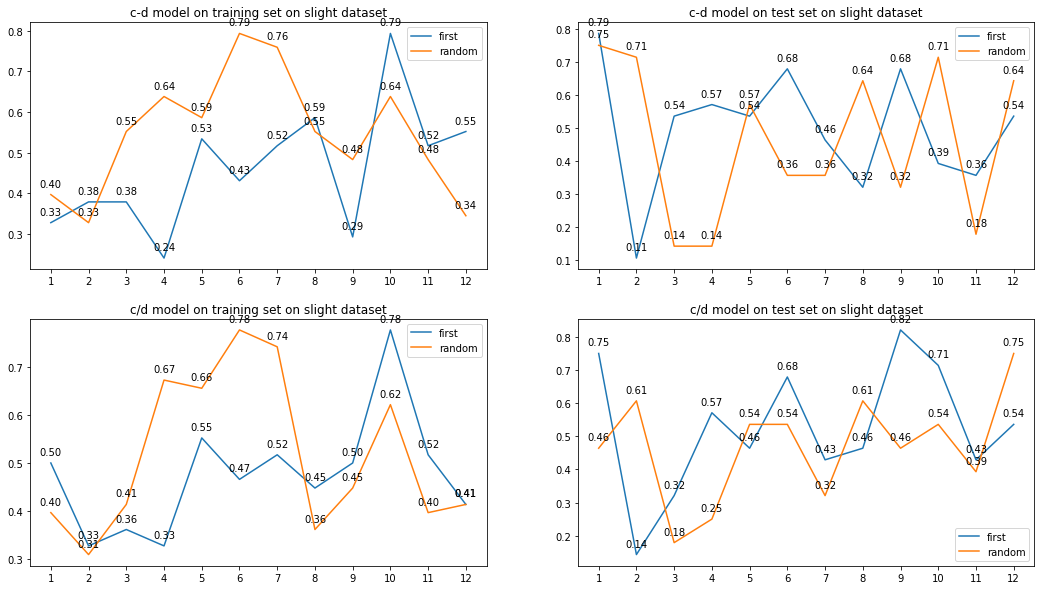

In [16]:
make_plot(25, "full", xasis, "onetime", "accu")
make_plot(25, "mild", xasis, "onetime", "accu")
make_plot(25, "slight", xasis, "onetime", "accu")

### 50%

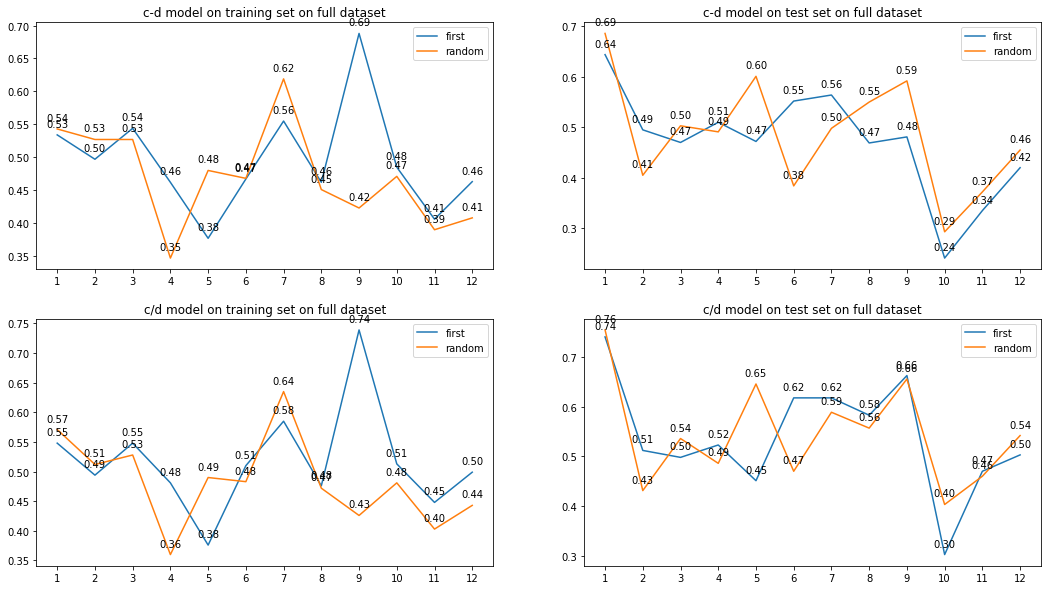

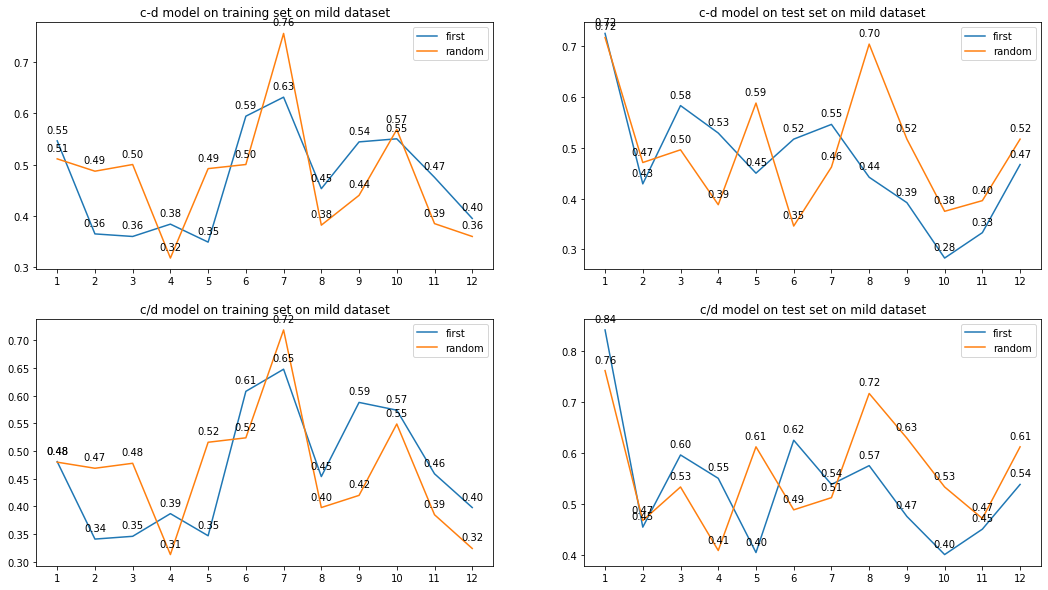

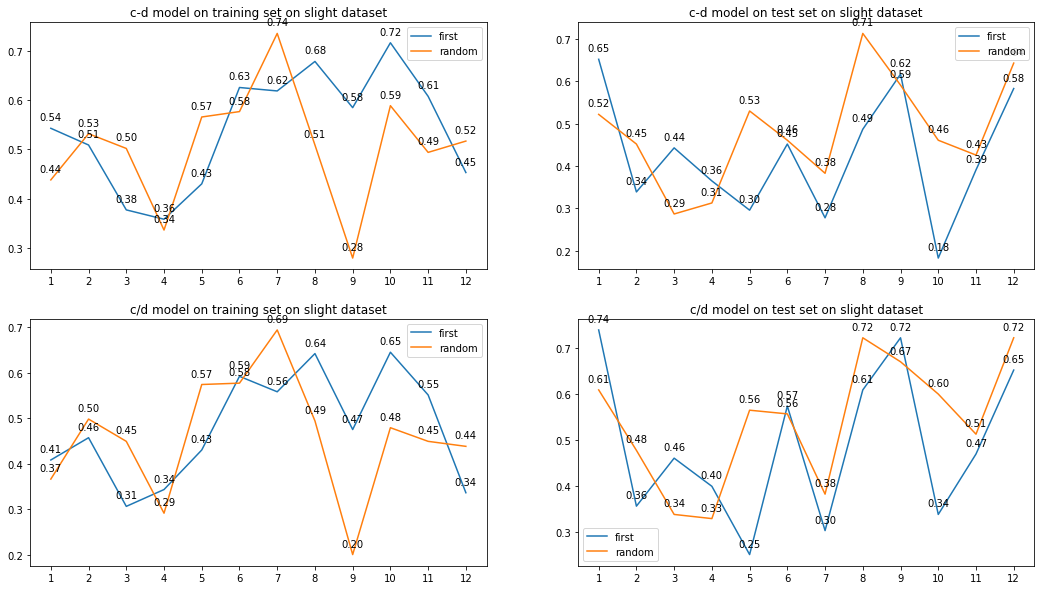

In [17]:
make_plot(50, "full", xasis, "onetime", "auc")
make_plot(50, "mild", xasis, "onetime", "auc")
make_plot(50, "slight", xasis, "onetime", "auc")

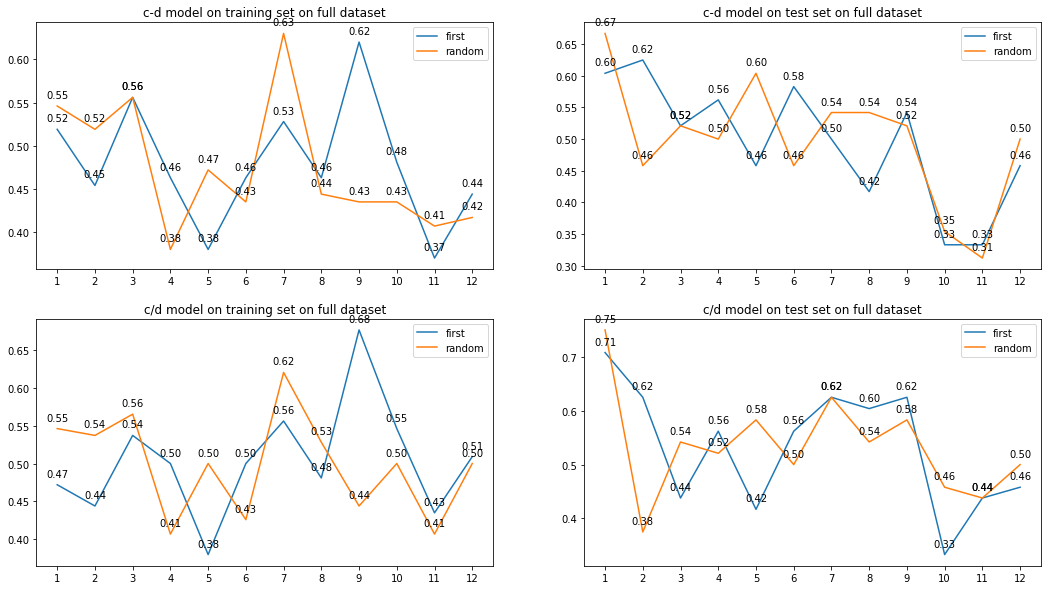

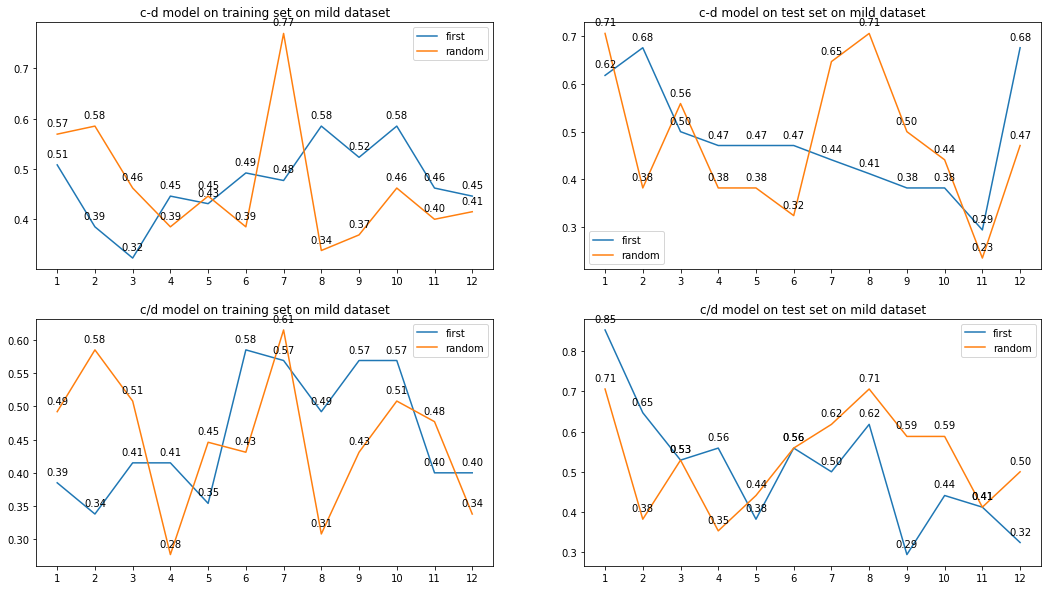

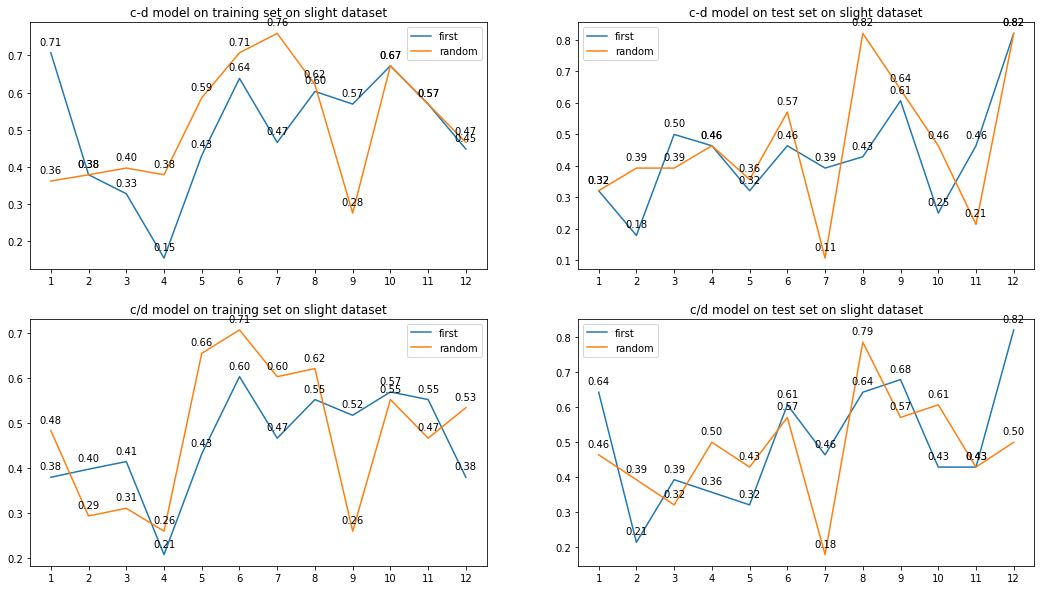

In [18]:
make_plot(50, "full", xasis, "onetime", "accu")
make_plot(50, "mild", xasis, "onetime", "accu")
make_plot(50, "slight", xasis, "onetime", "accu")

### 75%

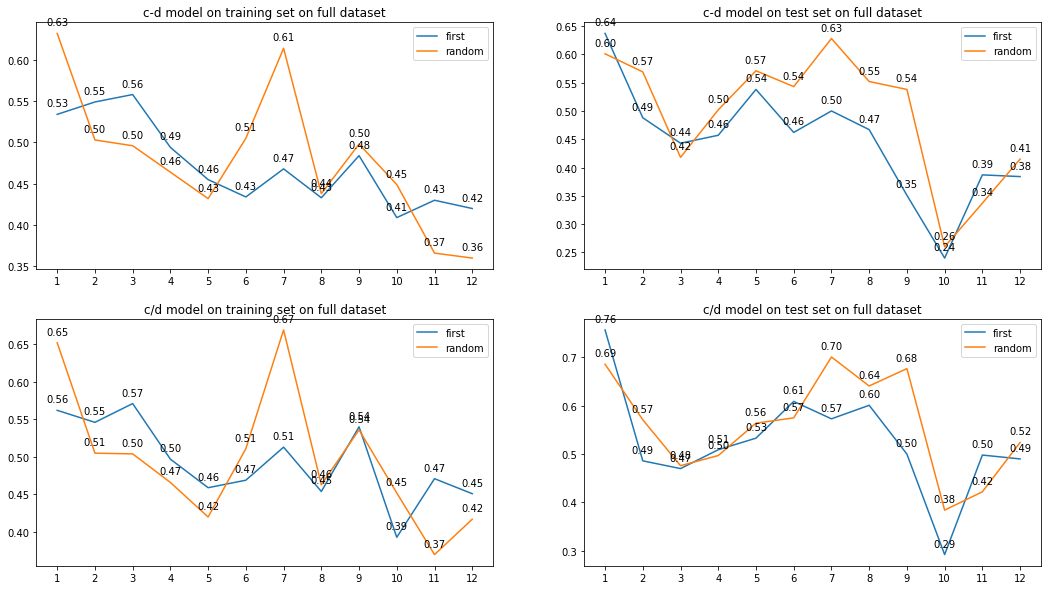

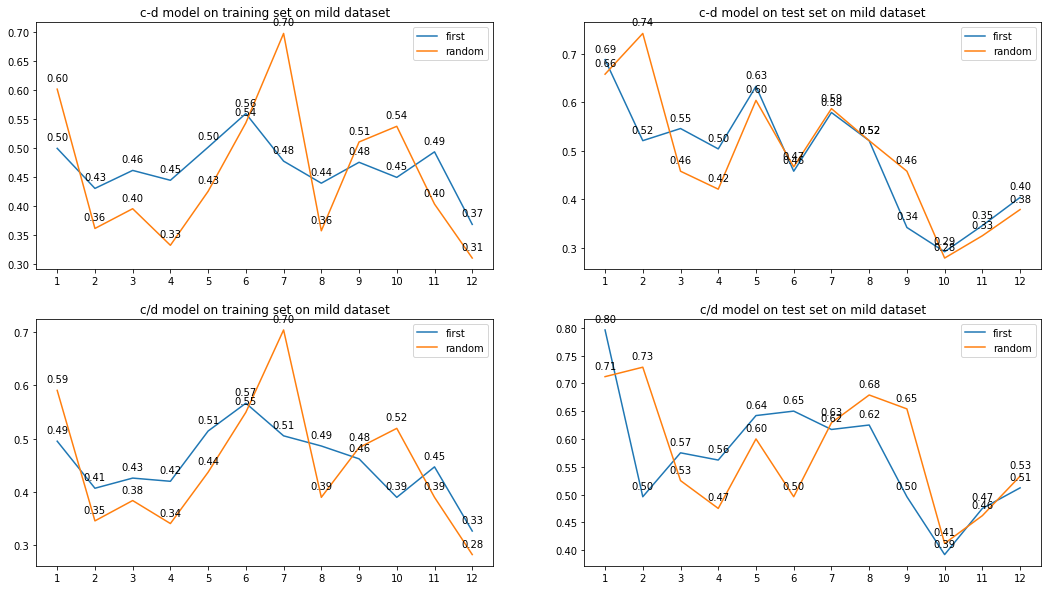

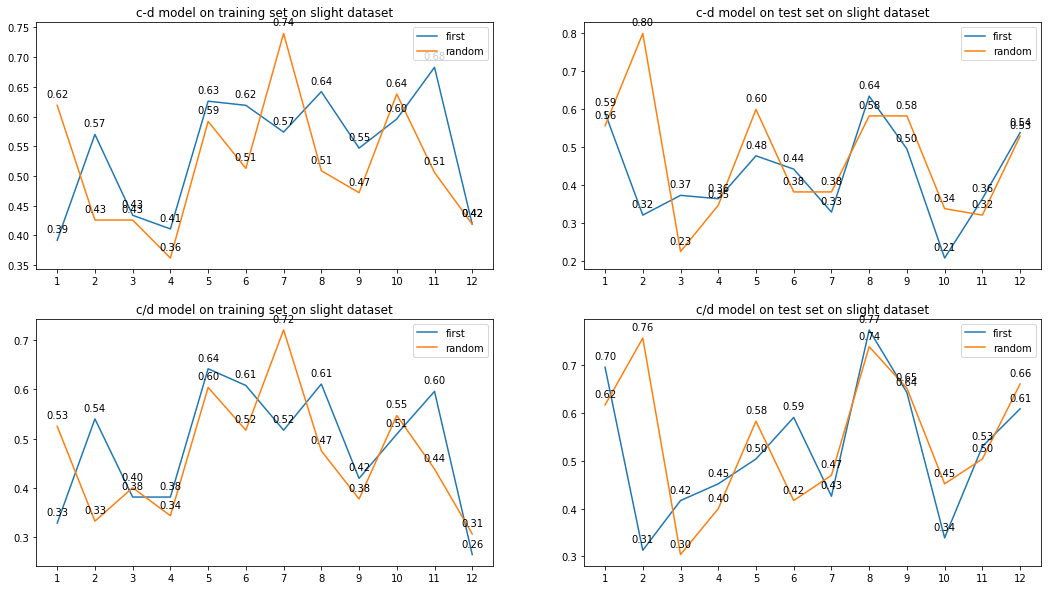

In [19]:
make_plot(75, "full", xasis, "onetime", "auc")
make_plot(75, "mild", xasis, "onetime", "auc")
make_plot(75, "slight", xasis, "onetime", "auc")

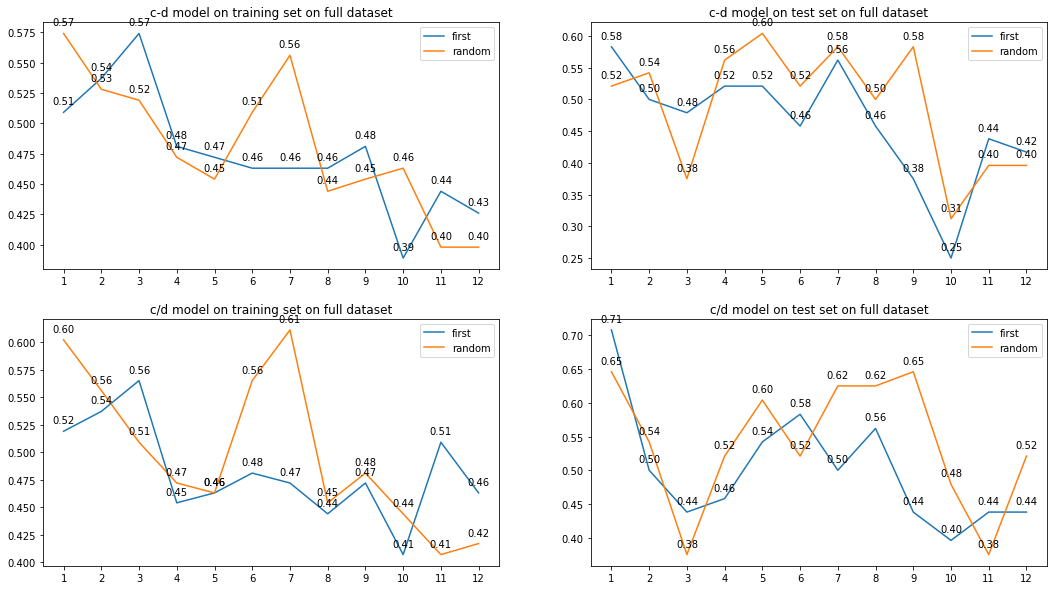

In [20]:
make_plot(75, "full", xasis, "onetime", "accu")
make_plot(75, "mild", xasis, "onetime", "accu")
make_plot(75, "slight", xasis, "onetime", "accu")

### 100%

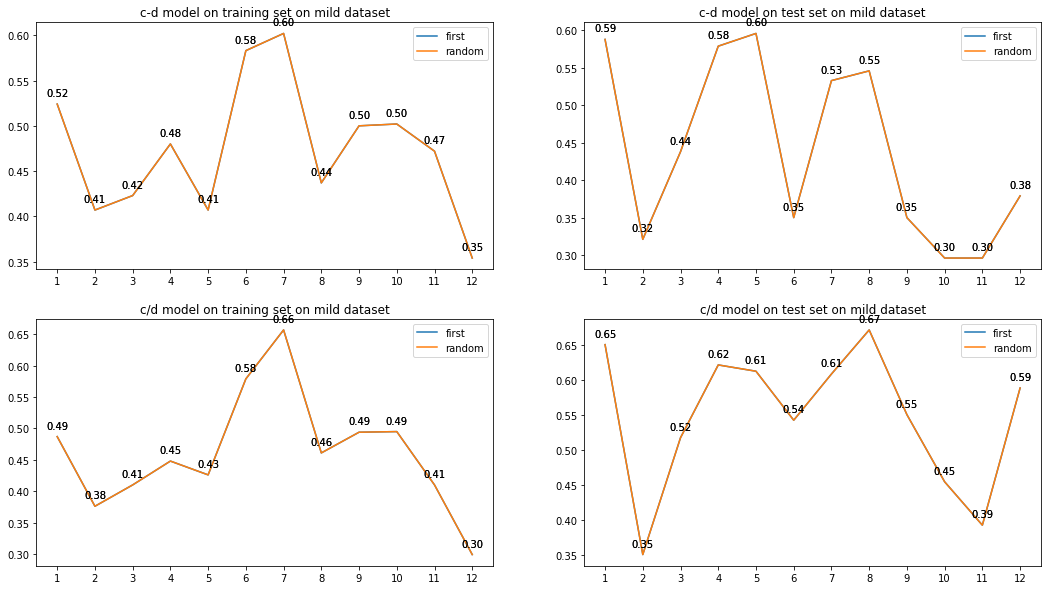

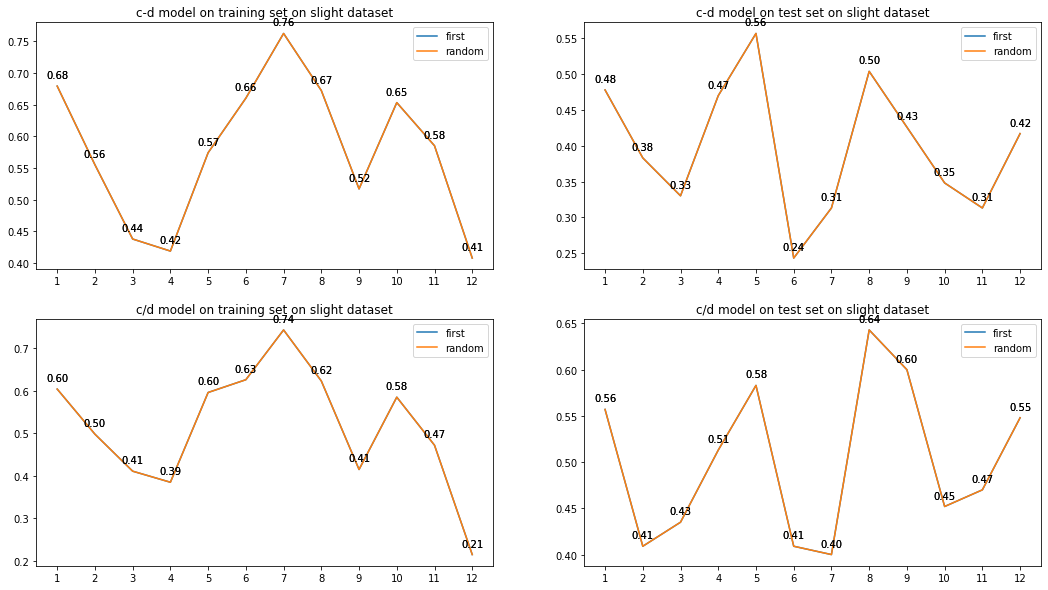

In [21]:
make_plot(100, "full", xasis, "onetime", "auc")
make_plot(100, "mild", xasis, "onetime", "auc")
make_plot(100, "slight", xasis, "onetime", "auc")

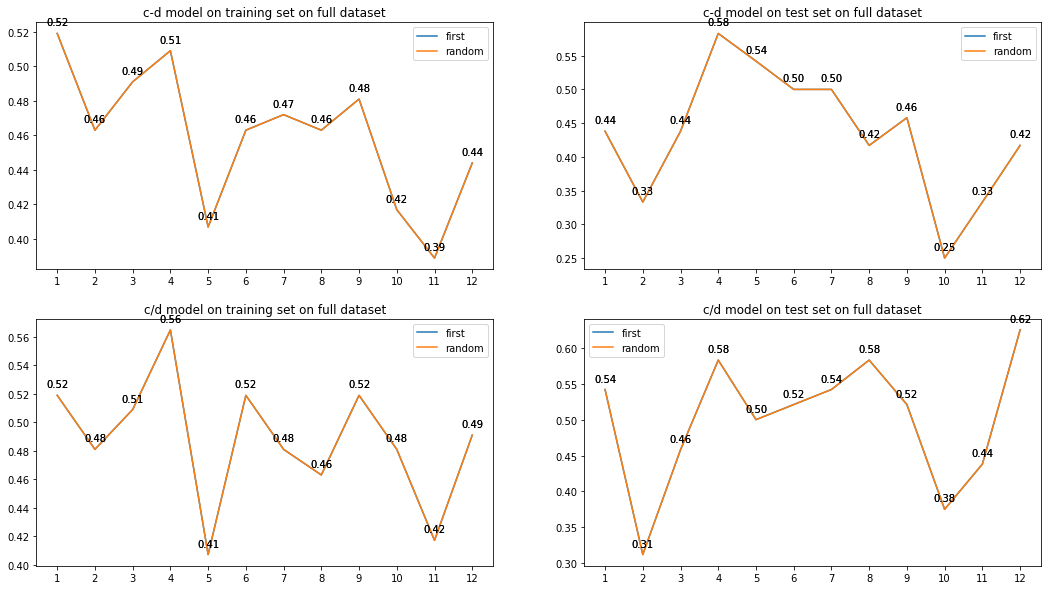

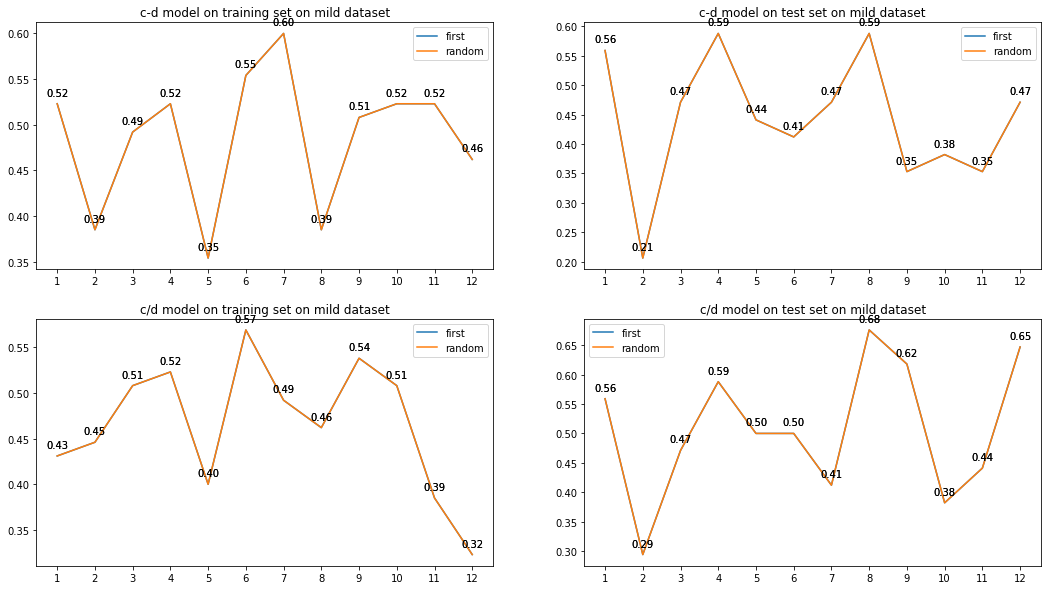

In [22]:
make_plot(100, "full", xasis, "onetime", "accu")
make_plot(100, "mild", xasis, "onetime", "accu")
make_plot(100, "slight", xasis, "onetime", "accu")